In [6]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
#from astropy.table import Table
from astropy.io import fits
%matplotlib notebook

3645 start point
5475 end point
r band histogram

# After wavelength cut

In [7]:
encoded = np.load(f"RUN32_CUT/encoded_32_cut.npy")
val_encoded = np.load(f"RUN32_CUT/encoded_val_32_cut.npy")
encoded_final = np.load(f"encoded_final_final_z3.npy")

In [3]:
len(val_encoded)

490

## Research sample

In [118]:
tsne = manifold.TSNE(n_components=2, init='random',
                     random_state=10, perplexity=10, n_iter=3000) #n_jobs=-1)

arr = np.concatenate((encoded,encoded_final))
X = tsne.fit_transform(arr)

KeyboardInterrupt: 

In [61]:
X = (X-np.min(X))/(np.max(X)-np.min(X))
np.save("final_tsne_z3.npy",X)

<IPython.core.display.Javascript object>


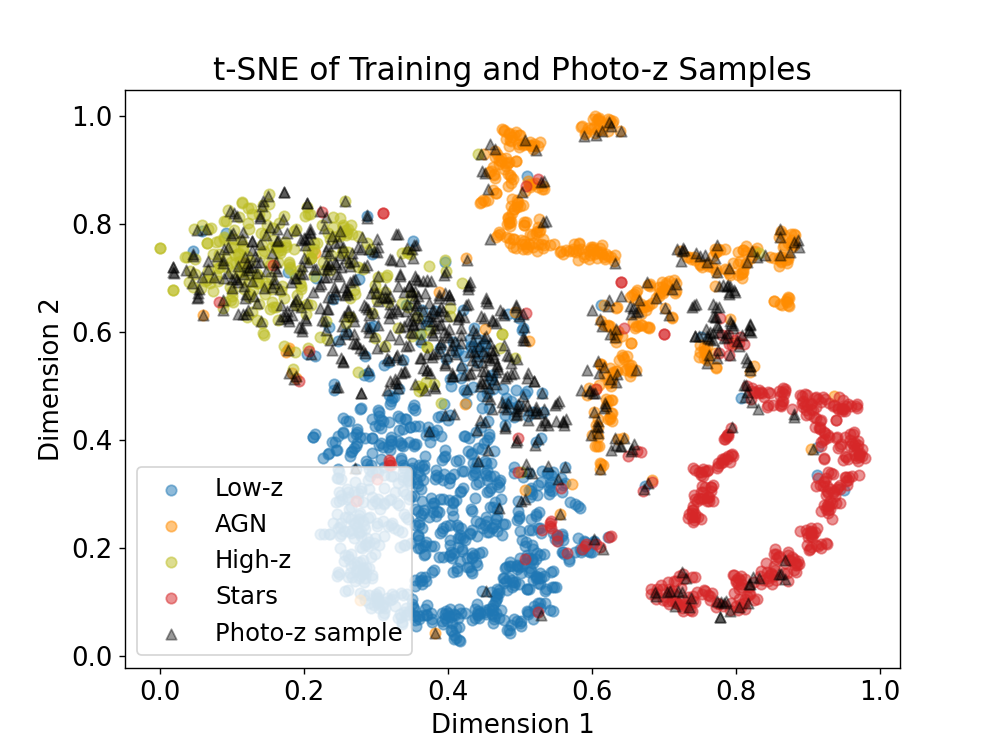

In [13]:
X = np.load("final_tsne_z3.npy")

plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(8,6))
plt.scatter(X[433+444:433+444+837,0],X[433+444:433+444+837,1], label="Low-z",color="tab:blue",alpha=0.5)
plt.scatter(X[433:433+444,0],X[433:433+444,1],label="AGN",color="darkorange",alpha=0.5)
plt.scatter(X[433+444+837:433+444+837+254,0],X[433+444+837:433+444+837+254,1], label="High-z",color="tab:olive",alpha=0.5)
plt.scatter(X[:433,0],X[:433,1],label="Stars",color="tab:red",alpha=0.5)
plt.scatter(X[433+444+837+254:,0],X[433+444+837+254:,1], label="Photo-z sample",marker="^",color="black",alpha=0.4)
plt.legend(prop={'size': 14},loc="lower left")
plt.title("t-SNE of Training and Photo-z Samples")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
#plt.savefig("tsne_labeled_axes.png")

716

<IPython.core.display.Javascript object>


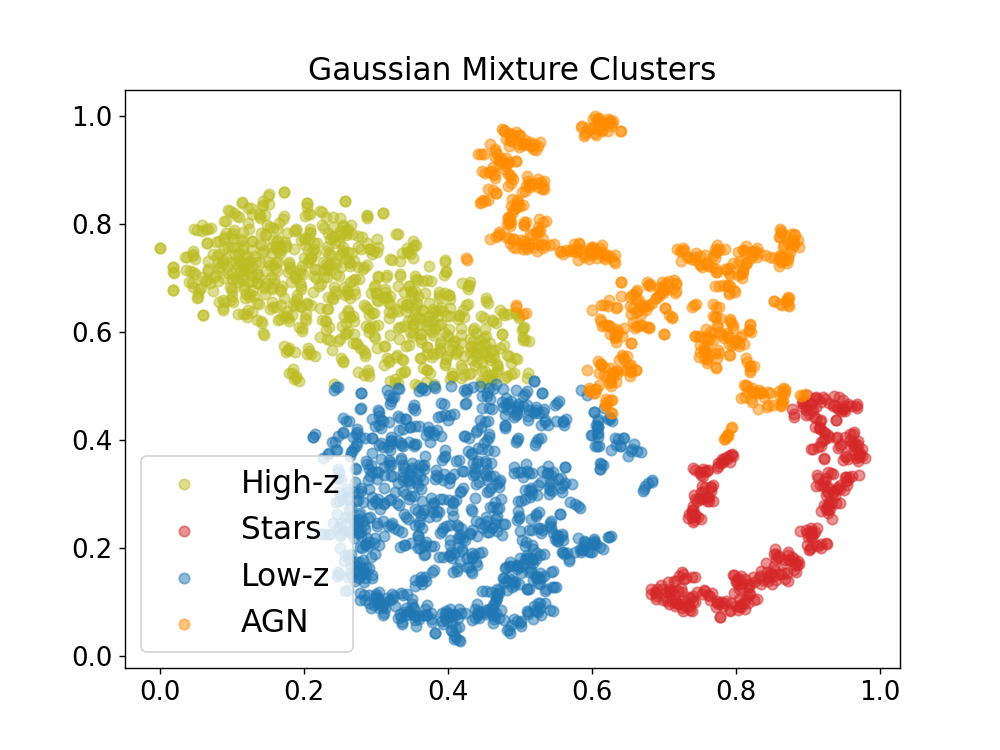

In [39]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=4,random_state=1)

model.fit(X)

yhat = model.predict(X)

clusters = np.unique(yhat)

plt.figure(figsize=(8,6))

plt.title("Gaussian Mixture Clusters")

for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    if cluster == 0:
        plt.scatter(X[row_ix, 0], X[row_ix, 1],color = "tab:olive",alpha = 0.5,label="High-z")
    if cluster == 1:
        plt.scatter(X[row_ix, 0], X[row_ix, 1],color = "tab:red",alpha = 0.5,label="Stars")
    if cluster == 2:
        plt.scatter(X[row_ix, 0], X[row_ix, 1],color = "tab:blue",alpha = 0.5,label="Low-z")
    if cluster == 3:
        plt.scatter(X[row_ix, 0], X[row_ix, 1],color = "darkorange",alpha = 0.5,label="AGN")

plt.legend(prop={'size': 18})
plt.savefig("clustersz3.png")


In [69]:
labels1 = np.concatenate((1+np.zeros(433),3+np.zeros(444),2+np.zeros(837),np.zeros(254)))
#labels2 = np.concatenate((1+np.zeros(107),3+np.zeros(111),2+np.zeros(209),np.zeros(63)))
#labels = np.concatenate((labels1,labels2))
correct = 0
for i, lab in enumerate(labels1):
    if lab == yhat[i]:
        correct = correct + 1
accuracy = correct/len(labels1)

agn_correct = 0
for i, lab in enumerate(labels1):
    if lab == 3:
        if yhat[:][i] == 3:
            agn_correct = agn_correct + 1
            
agn_accuracy = agn_correct/(444)



print(f"Total acc: {accuracy}")
print(f"AGN acc: {agn_accuracy}")

Total acc: 0.8907520325203252
AGN acc: 0.9054054054054054


In [10]:
#labels_final = yhat[433+444+837+254:]
labels_final = np.load("labels_z3.npy")
highz_index = np.where((labels_final == 0))
star_index = np.where((labels_final == 1))
agn_index = np.where((labels_final == 3))
lowz_index = np.where((labels_final == 2))
#np.save("labels_z3",labels_final)


In [8]:
spectra_final = fits.getdata("hetdex_z3_spec.fits")
wave = spectra_final["wavelength"][1]
def Norm_fits(data):
    new_data = []
    for spec in data:
        spec = spec/np.nanmax(spec)
        new_data.append(spec)
    return np.array(new_data)

def isNaN(num):
    return num != num

def remove_nan(file):
    for i in range(0,len(file)):
        for j in range(0,len(file[i])):
            if isNaN(file[i][j]):
                file[i][j]=0.00001
                

spectra_final = Norm_fits(spectra_final["spec"])
remove_nan(spectra_final)
spectra_final = spectra_final[:,88:1002]
spectra_final = Norm_fits(spectra_final)

In [4]:
a = np.load("decoded_final_final_z3.npy")

<IPython.core.display.Javascript object>


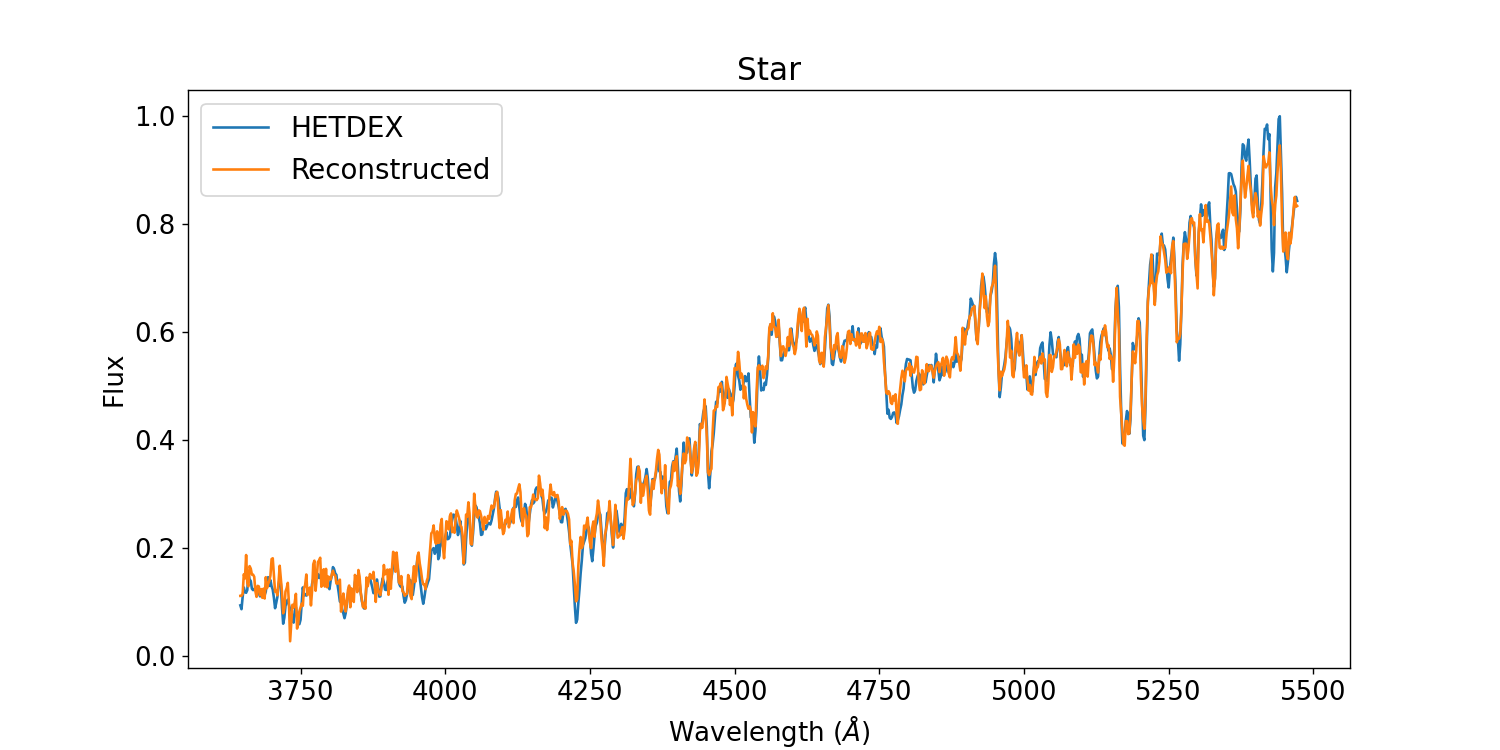

In [11]:

plt.figure(figsize=(12,6))
plt.plot(wave[88:1002],spectra_final[star_index[0][1]],color="tab:blue",label="HETDEX")
plt.plot(wave[88:1002],a[star_index[0][1]],color="tab:orange",label="Reconstructed")
plt.title("Star")
plt.ylabel("Flux")
plt.xlabel(r"Wavelength ($\AA$)")
plt.legend(prop={'size': 16})
#plt.savefig("Starz3.png")

<IPython.core.display.Javascript object>


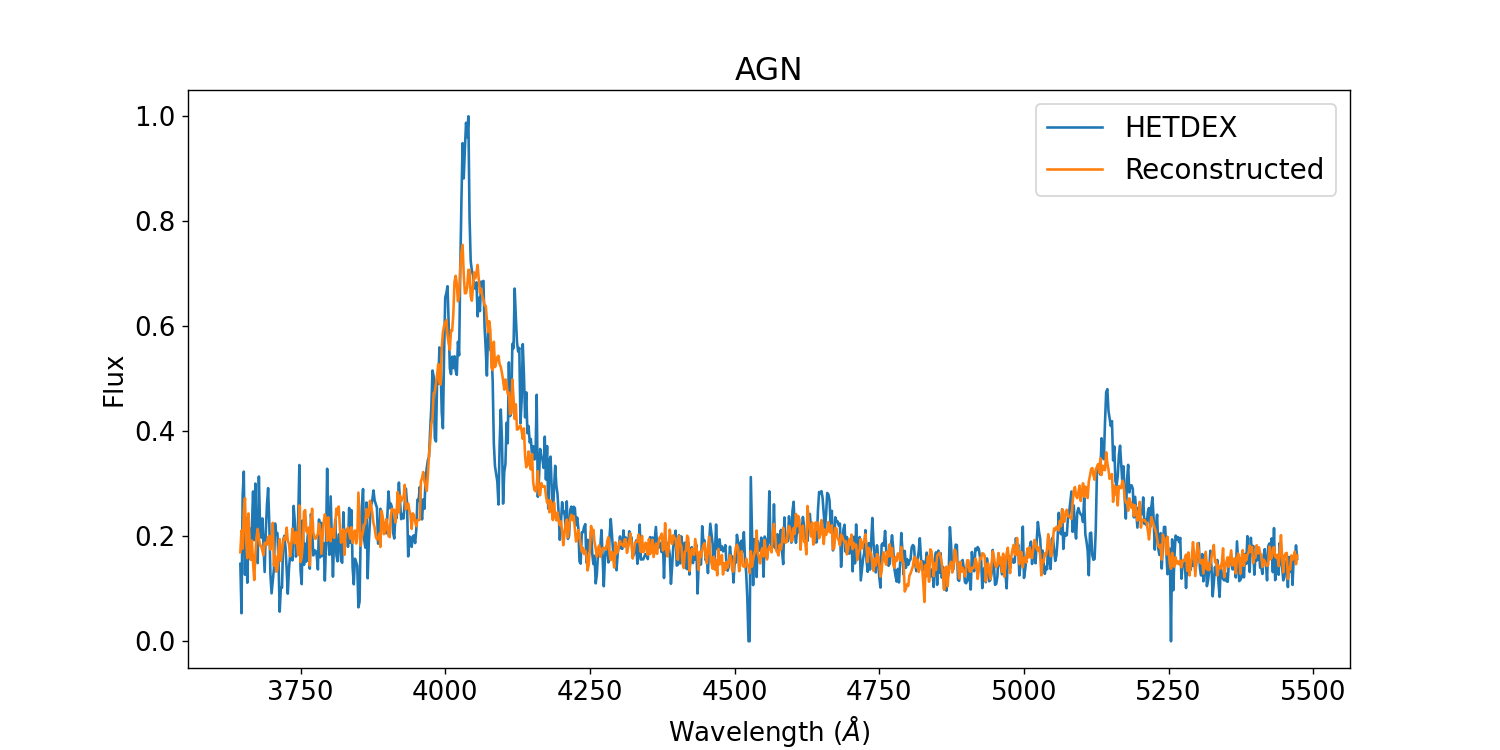

In [32]:

plt.figure(figsize=(12,6))
plt.plot(wave[88:1002],spectra_final[agn_index[0][46]],color="tab:blue",label="HETDEX")
plt.plot(wave[88:1002],a[agn_index[0][46]],color="tab:orange",label="Reconstructed")
plt.title("AGN")
plt.ylabel("Flux")
plt.xlabel(r"Wavelength ($\AA$)")
plt.legend(prop={'size': 16})
plt.savefig("agnz3.png")

<IPython.core.display.Javascript object>


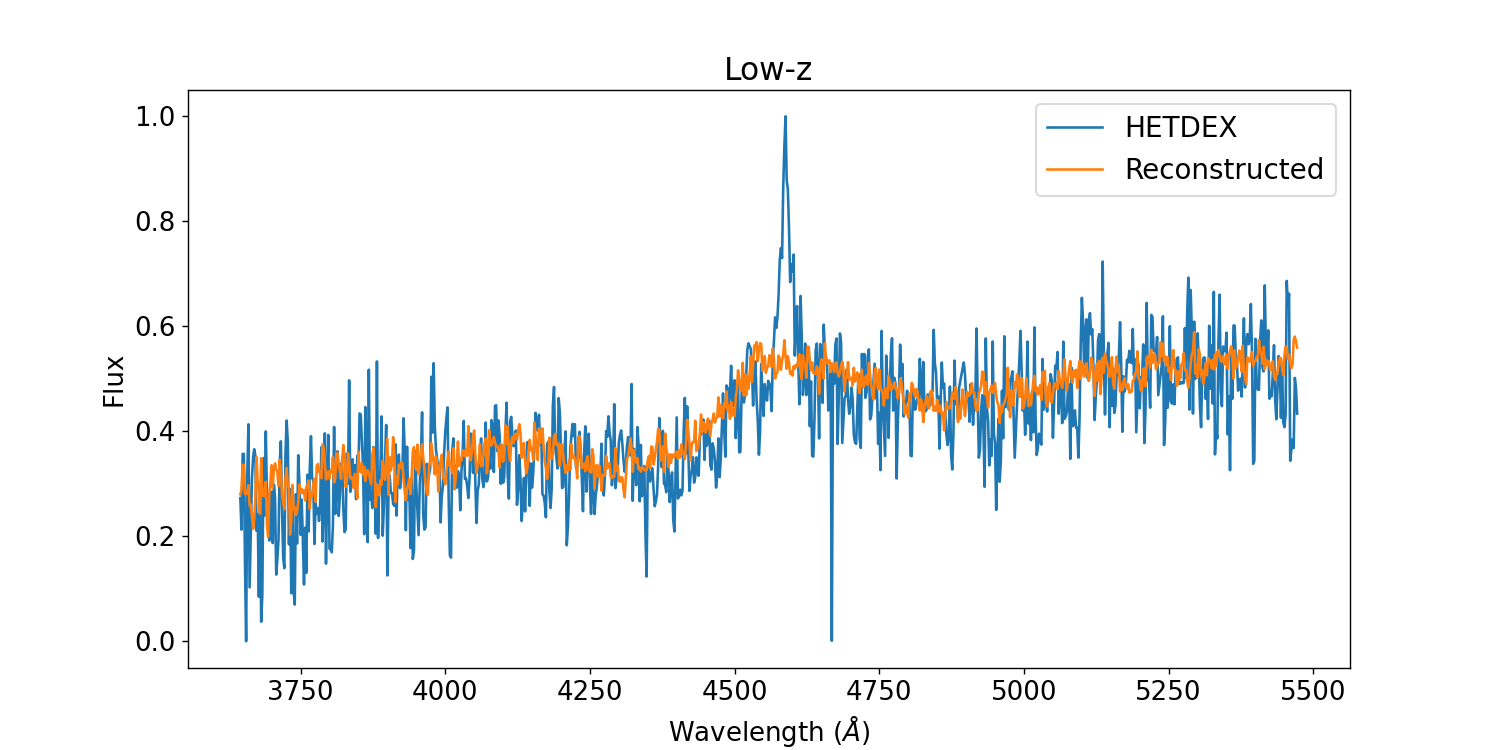

In [33]:
plt.figure(figsize=(12,6))
plt.plot(wave[88:1002],spectra_final[lowz_index[0][0]],color="tab:blue",label="HETDEX")
plt.plot(wave[88:1002],a[lowz_index[0][0]],color="tab:orange",label="Reconstructed")
plt.title("Low-z")
plt.ylabel("Flux")
plt.xlabel(r"Wavelength ($\AA$)")
plt.legend(prop={'size': 16})
plt.savefig("lowz3.png")

<IPython.core.display.Javascript object>


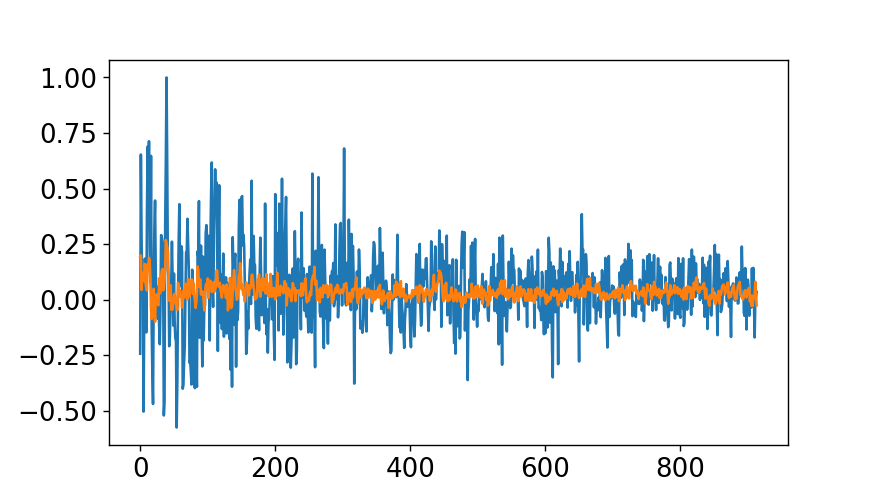

<IPython.core.display.Javascript object>


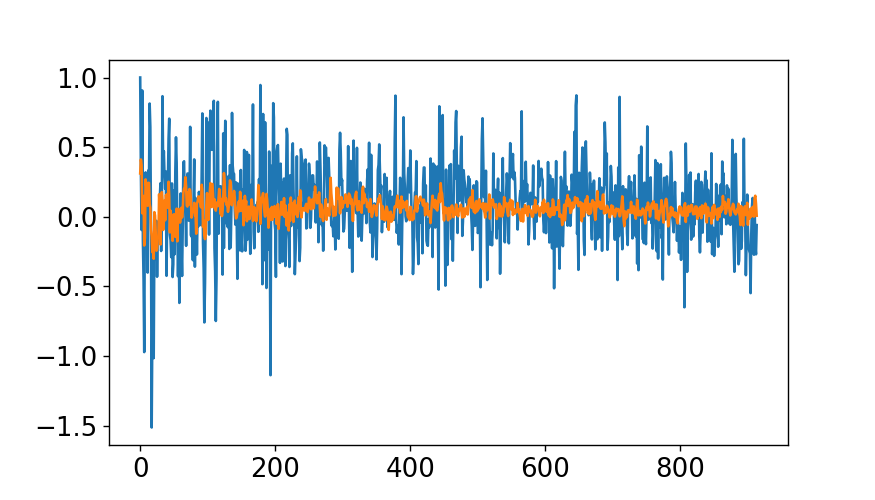

<IPython.core.display.Javascript object>


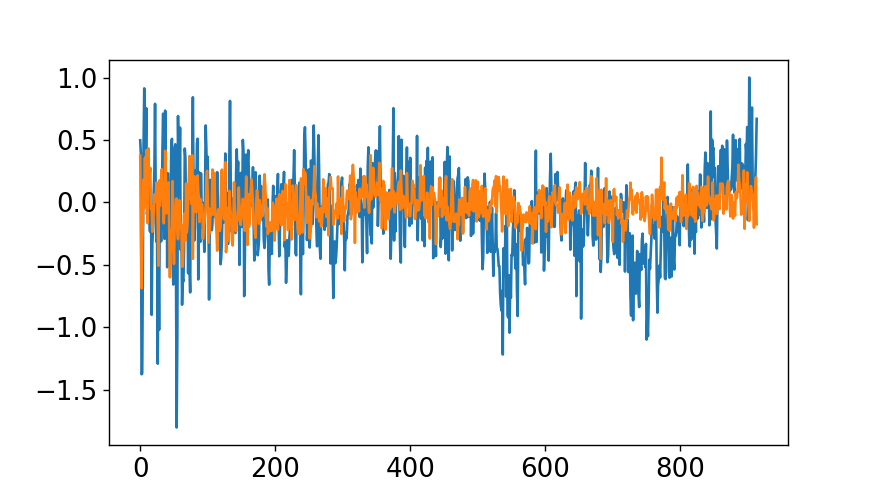

<IPython.core.display.Javascript object>


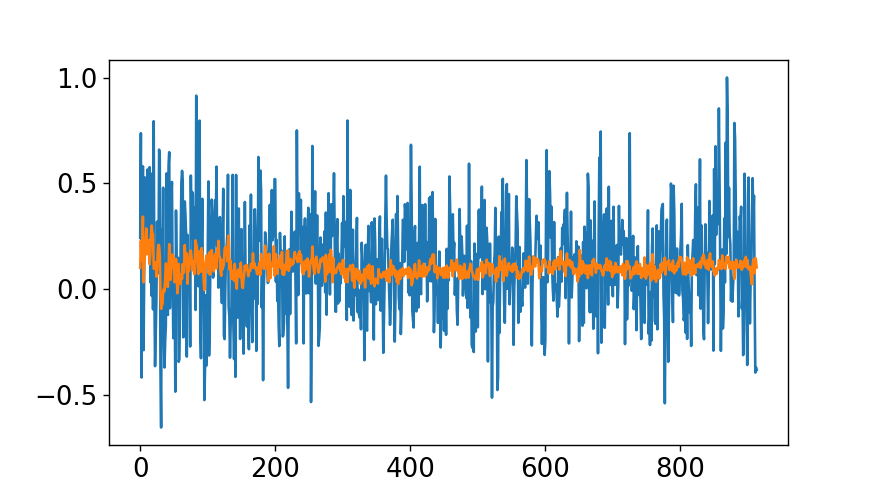

<IPython.core.display.Javascript object>


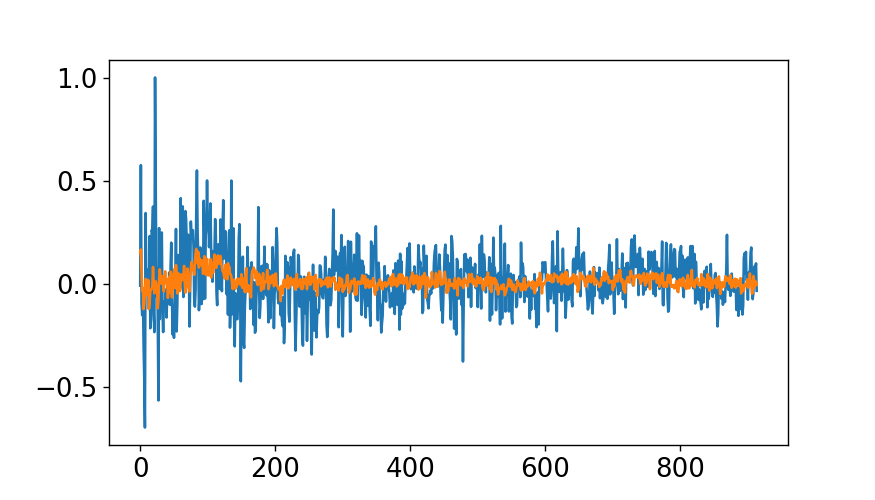

<IPython.core.display.Javascript object>


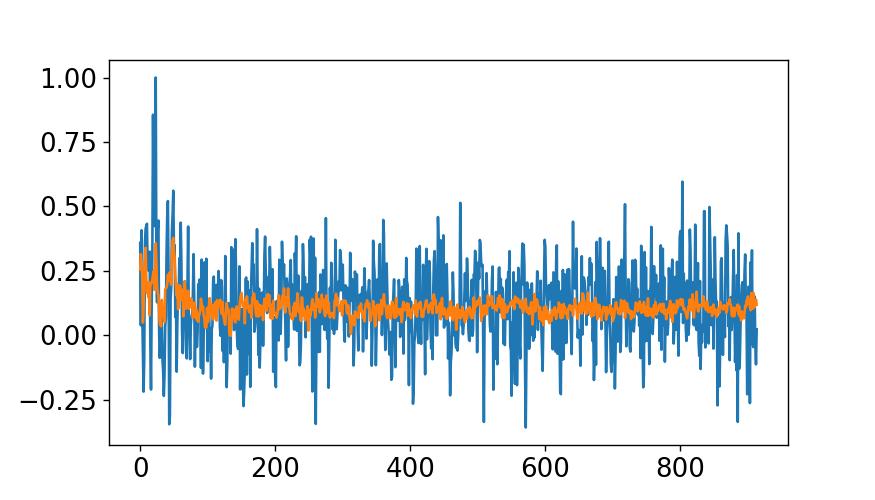

<IPython.core.display.Javascript object>


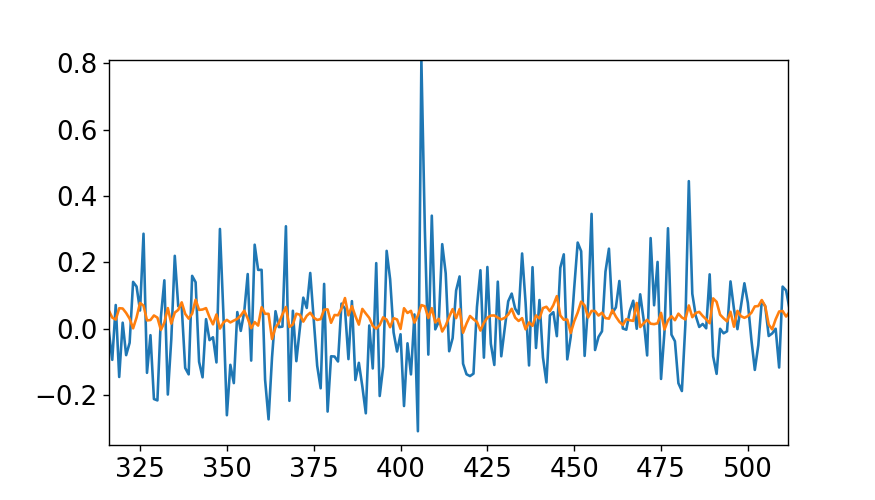

<IPython.core.display.Javascript object>


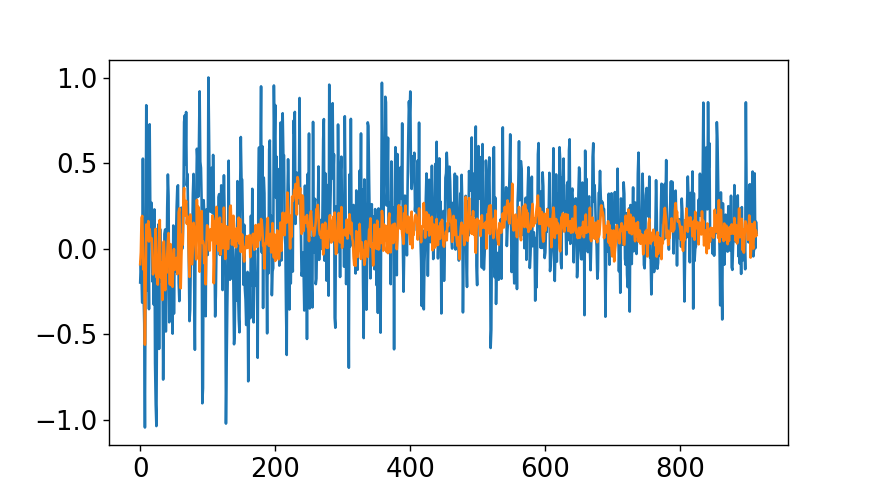

<IPython.core.display.Javascript object>


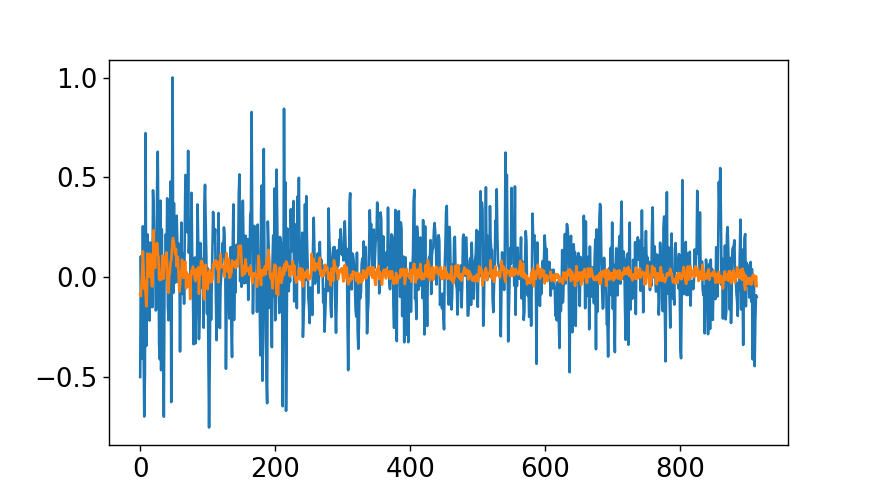

<IPython.core.display.Javascript object>


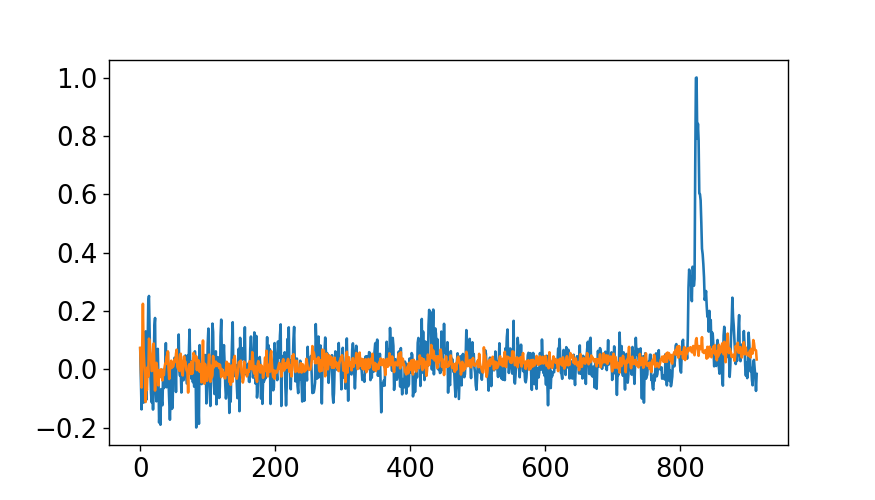

In [15]:
for i in highz_index[0][10:20]:
    plt.figure(figsize=(7,4))
    plt.plot(spectra_final[i])
    plt.plot(a[i])

In [74]:
len(lowz_index[0])

100

<IPython.core.display.Javascript object>


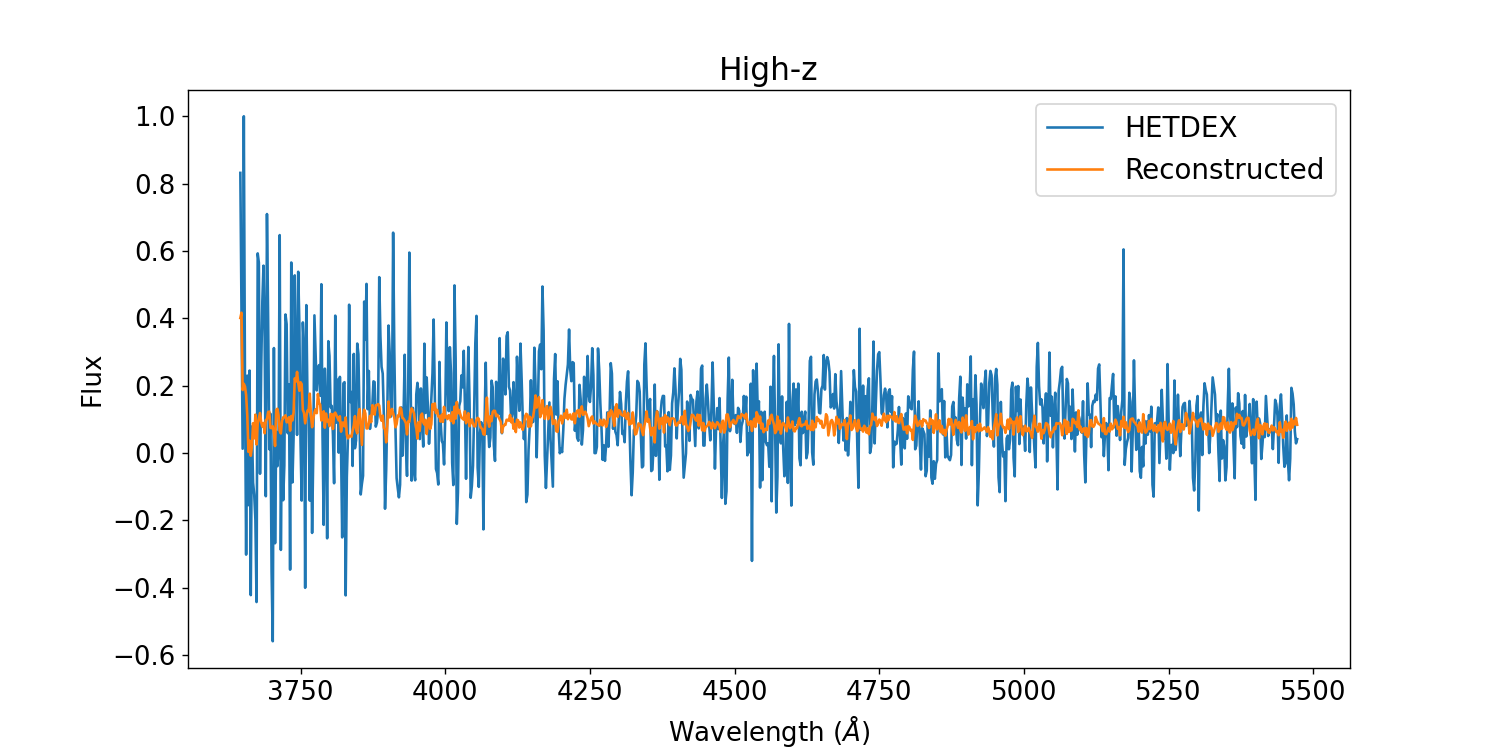

In [34]:
plt.figure(figsize=(12,6))
plt.plot(wave[88:1002],spectra_final[highz_index[0][7]],color="tab:blue",label="HETDEX")
plt.plot(wave[88:1002],a[highz_index[0][7]],color="tab:orange",label="Reconstructed")
plt.title("High-z")
plt.ylabel("Flux")
plt.xlabel(r"Wavelength ($\AA$)")
plt.legend(prop={'size': 16})
plt.savefig("highz3.png")

In [95]:
import sklearn

labels = np.concatenate((1+np.zeros(433),3+np.zeros(444),2+np.zeros(837),np.zeros(254)))

sklearn.metrics.confusion_matrix(labels,yhat[:433+444+837+254:])

array([[247,   0,   5,   2],
       [  7, 337,  31,  58],
       [ 63,   3, 767,   4],
       [ 12,   2,  28, 402]])